In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
path_calories = "G:/Other computers/My Laptop/College/CIS - 508/Datasets/Calories/calories.csv"
path_exercise = "G:/Other computers/My Laptop/College/CIS - 508/Datasets/Calories/exercise.csv"

In [3]:
calories_orig = pd.read_csv(path_calories)
calories_orig.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
calories_orig.shape

(15000, 2)

In [5]:
exercise_orig = pd.read_csv(path_exercise)
exercise_orig.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
exercise_orig.shape

(15000, 8)

Combining the two datasets

In [7]:
exercise = pd.merge(left = exercise_orig, right = calories_orig, left_on ="User_ID", right_on = "User_ID")

In [8]:
exercise.shape

(15000, 9)

In [9]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [10]:
exercise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [11]:
exercise.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

weight looks to be in kg, body_temp looks to be in Celsius

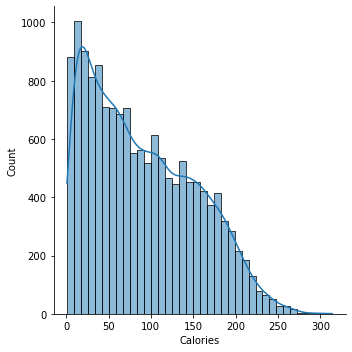

In [12]:
sns.displot(exercise.Calories, kde = True)

Calories variable looks to be right skewed

Analysis of categorical variables

<AxesSubplot:xlabel='Gender', ylabel='count'>

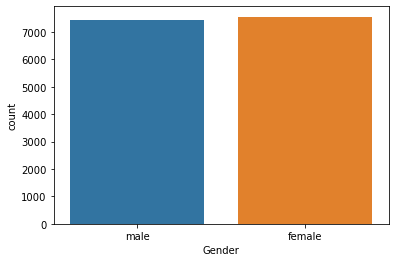

In [13]:
sns.countplot(x = "Gender", data=exercise)

Analysis of numerical variables

In [14]:
exercise.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [15]:
exercise.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


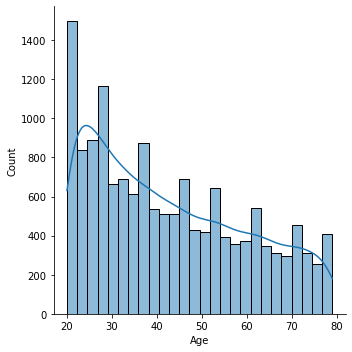

In [16]:
sns.displot(x="Age", data=exercise, kde = True)

There is more data for the younger generation

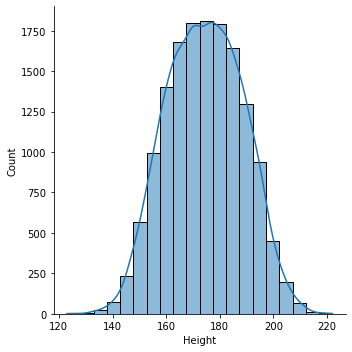

In [17]:
sns.displot(x="Height", data=exercise, kde = True, bins=20)

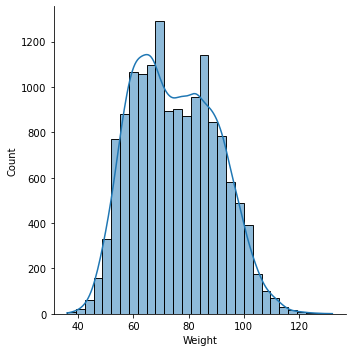

In [18]:
sns.displot(x="Weight", data=exercise, kde = True, bins=30)

there are 2 peaks 

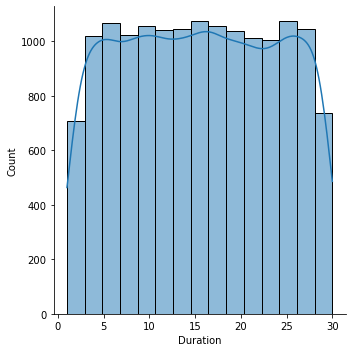

In [19]:
sns.displot(x="Duration", data=exercise, kde = True, bins=15)

Duration appears to be in minutes onservation time of an individual is not more than 30 minutes

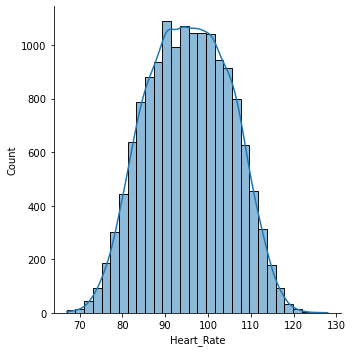

In [20]:
sns.displot(x="Heart_Rate", data=exercise, kde=True, bins=30)

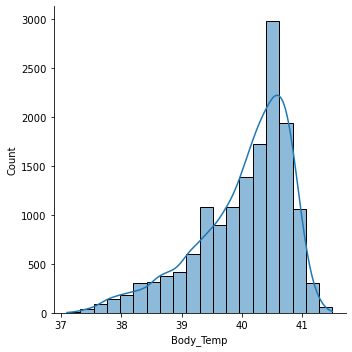

In [21]:
sns.displot(x="Body_Temp", data=exercise, kde=True, bins=20)

Body temp seems to be left skewed

<AxesSubplot:>

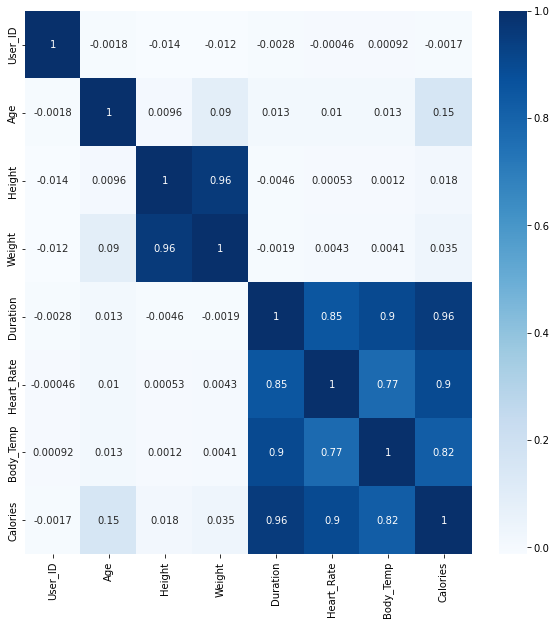

In [22]:
correlation = exercise.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot = True, cmap='Blues')

There appears to be a strong correlation between Duration/Heart Rate/ Body Temp and Calories

Analyzing the highly correlated features further. 

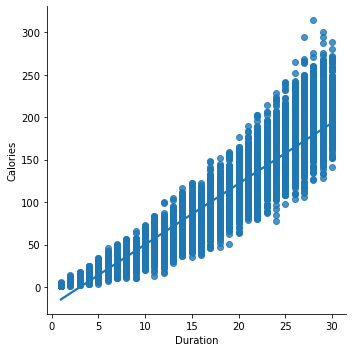

In [23]:
sns.lmplot(x="Duration", y="Calories", data=exercise)
plt.show()

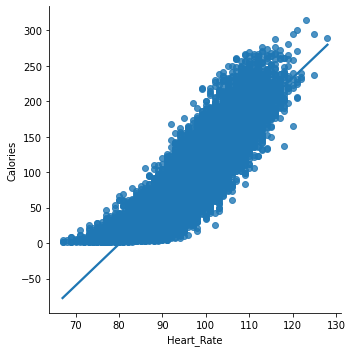

In [24]:
sns.lmplot(x="Heart_Rate", y="Calories", data=exercise)
plt.show()

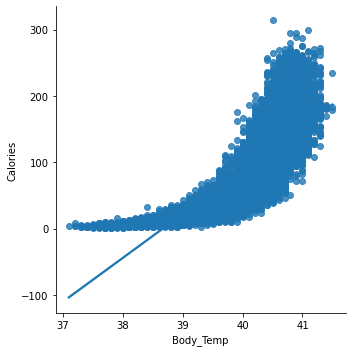

In [25]:
sns.lmplot(x="Body_Temp", y="Calories", data=exercise)
plt.show()

Model training with duration

In [26]:
X = exercise[['Duration']]
y = exercise['Calories']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Linear Regression

In [28]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

LinearRegression()

In [29]:
pred_train = linear_regression.predict(X_train)
score_train = metrics.r2_score(y_train, pred_train)
print(score_train)

0.9123562018290068


In [30]:
pred_test = linear_regression.predict(X_test)
score_test = metrics.r2_score(y_test, pred_test)
print(score_test)

0.9145047527249381


In [31]:
print("Mean Absolute Error:", mean_absolute_error(y_test, pred_test))
print("Mean Squared Error",metrics.mean_squared_error(y_test,pred_test))
print("Root Mean Squared Error",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))

Mean Absolute Error: 13.61349078470049
Mean Squared Error 345.04099030520075
Root Mean Squared Error 18.57527901015758


Including Body Temp and Heart Rate

In [32]:
X = exercise[['Duration', 'Body_Temp', 'Heart_Rate']]
y = exercise['Calories']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [34]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [35]:
pred_train = linear_regression.predict(X_train)
score_train = metrics.r2_score(y_train, pred_train)
print(score_train)

0.9461832012251213


In [36]:
pred_test = linear_regression.predict(X_test)
score_test = metrics.r2_score(y_test, pred_test)
print(score_test)

0.946458493201565


In [37]:
print("Mean Absolute Error:", mean_absolute_error(y_test, pred_test))
print("Mean Squared Error",metrics.mean_squared_error(y_test,pred_test))
print("Root Mean Squared Error",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))

Mean Absolute Error: 10.648723469725015
Mean Squared Error 216.08235682070838
Root Mean Squared Error 14.699740025616384


Including all the features

In [38]:
exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [39]:
label_encoder = LabelEncoder()
exercise.Gender = label_encoder.fit_transform(exercise.Gender)

In [40]:
exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,1,78,193.0,97.0,2.0,84.0,38.3,11.0


In [41]:
X = exercise.drop(['Calories', 'User_ID'], axis=1)
y = exercise['Calories']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [43]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [44]:
pred_train = linear_regression.predict(X_train)
score_train = metrics.r2_score(y_train, pred_train)
print(score_train)

0.9671621074066676


In [45]:
pred_test = linear_regression.predict(X_test)
score_test = metrics.r2_score(y_test, pred_test)
print(score_test)

0.9672937151257295


In [46]:
print("Mean Absolute Error:", mean_absolute_error(y_test, pred_test))
print("Mean Squared Error",metrics.mean_squared_error(y_test,pred_test))
print("Root Mean Squared Error",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))

Mean Absolute Error: 8.441513553849713
Mean Squared Error 131.9957457508169
Root Mean Squared Error 11.488940149152876


with all the features in linear regression gave the maximum score

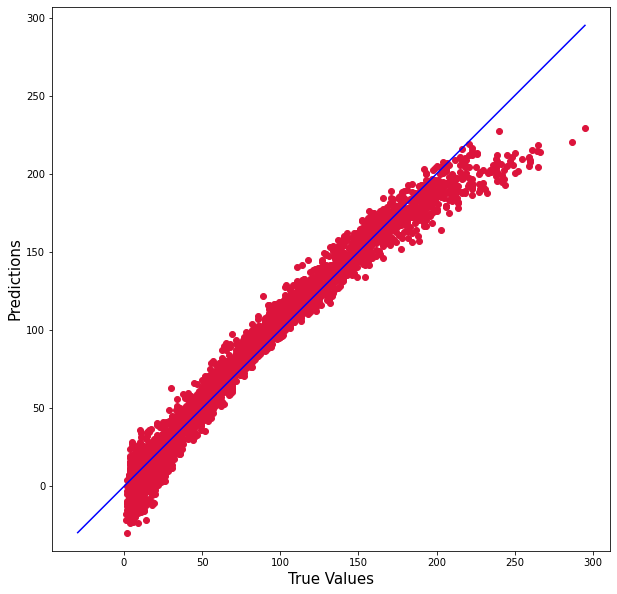

In [47]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred_test, c='crimson')

p1 = max(max(pred_test),max(y_test))
p2 = min(min(pred_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Random Forest Regression

In [48]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)
pred_train = random_forest.predict(X_train)
score_train = metrics.r2_score(y_train, pred_train)
print(score_train)

0.9996898939349437


In [49]:
pred_test = random_forest.predict(X_test)
score_test = metrics.r2_score(y_test, pred_test)
print(score_test)

0.9982411916043731


In [50]:
print("Mean Absolute Error:", mean_absolute_error(y_test, pred_test))
print("Mean Squared Error",metrics.mean_squared_error(y_test,pred_test))
print("Root Mean Squared Error",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))

Mean Absolute Error: 1.69986
Mean Squared Error 7.098183933333334
Root Mean Squared Error 2.664241718263066


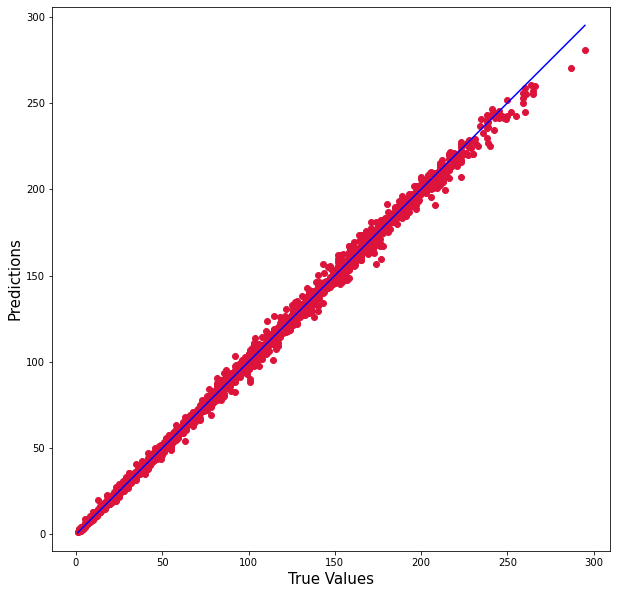

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred_test, c='crimson')

p1 = max(max(pred_test),max(y_test))
p2 = min(min(pred_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

XGBoost Regression

In [52]:
xgboost = XGBRegressor()
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [53]:
pred_test = xgboost.predict(X_test)
score_test = metrics.r2_score(y_test, pred_test)
print(score_test)

0.99876392008381


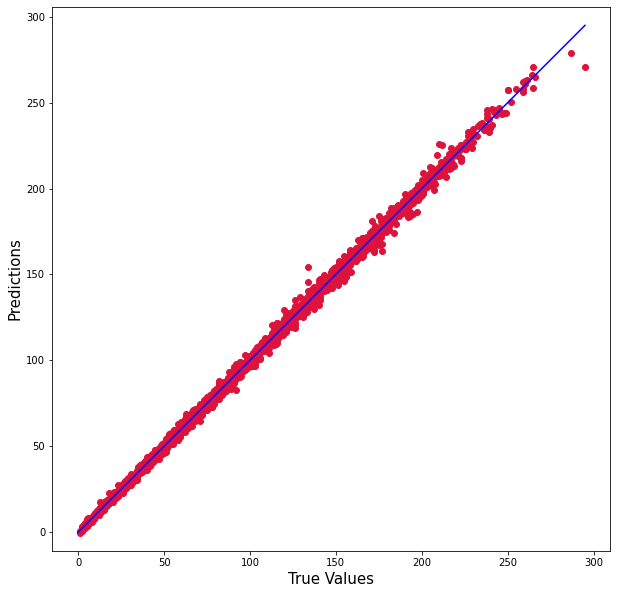

In [54]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred_test, c='crimson')

p1 = max(max(pred_test),max(y_test))
p2 = min(min(pred_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [55]:
print("Mean Absolute Error:", mean_absolute_error(y_test, pred_test))
print("Mean Squared Error",metrics.mean_squared_error(y_test,pred_test))
print("Root Mean Squared Error",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))

Mean Absolute Error: 1.5139621509313583
Mean Squared Error 4.988560791062734
Root Mean Squared Error 2.233508627935593


XGBoost Regression should be used for prediction